In [22]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.linear_model import LinearRegression

# Algorytm Neldera-Meada



Opis algorytmu na podstawie: https://medium.com/@crassoushadrien/nelder-mead-algorithm-a9075162722e

Algorytm służy do wyznaczania wartości minimalnej funkcji $f(x_1,x_2,...,x_n)$.

Został zaproponowany w 1965 roku.

Wybieramy $n+1$ punktów nieleżacych na jednej prostej (tworzą one simpleks). W dalszej części prezentacji zakłada się, że minimalizujemy funkcję dwóch zmiennych $(n = 2)$, więc wybrane zostaną trzy punkty.

Obliczamy wartości funkcji w każdym z punktów: $f(x_1)$, $f(x_2)$ i $f(x_3)$ i porządkujemy punkty tak, aby:

$$
f(x_1) \leq f(x_2) \leq f(x_3)
$$

czyli w funkcie $x_3$ mamy najgorszą wartość.

Wyznaczamy punkt $x_C$ znajdujący się w połowie ściany simpleksu położej naprzeciw najgorszego punktu $x_3$.


![](https://miro.medium.com/v2/resize:fit:360/format:webp/1*cvs2iFibzXFzwAbShMiA5g.png)

Naszym celem jest zmiana położenia najgorszego punktu (czyli $x_3$). Operację tę przeprowadzamy w następujących krokach.

Wyznaczamy punkt $x_R$ jako odbicie punktu $x_3$ względem punktu $x_C$.

![](https://miro.medium.com/v2/resize:fit:484/format:webp/1*nh9qdl-lWyNRso1KEG9mrg.png)

Jeżeli wartość $f(x_R)$ jest: 

- lepsza (mniejsza) od $f(x_3)$,
- i jednocześnie nie jest lepsza of $f(x_1)$

to punkt $x_R$ zastępuje nam punkt $x_3$.

Jeżeli wartość $f(x_r)$ jest:

- lepsza od wartości $f(x_3)$,
- i jednocześnie jest lepsza od wartości $f(x_1)$

to dwukrotnie zwiększamy odległość punktu $x_R$ od odcinka łączącego punkty $x_1$ i $x_2$.

![](https://miro.medium.com/v2/resize:fit:400/format:webp/1*E8jk2sf9urKGedLFO2UTqg.png)

Tak wyznaczony punkt zastępuje nam punkt $x_3$.

Jeżeli wartość $f(x_R)$ nie jest lepsza of wartości $f(x_2)$, to przesuwamy punkt $x_R$ tak, aby się znalazł pomiędzy punktem $x_3$ i odcinkiem łączącym punkty $x_1$ i $x_2$.

![](https://miro.medium.com/v2/resize:fit:288/format:webp/1*VAR-Ib6s-zDI56IzqbtjtA.png)

Jeżeli operacja przedstawiona w poprzednim kroku nie doprowadziła do wyznaczenia punktu o wartości lepszej od $f(x_3)$, to przesuwamy punkty $x_2$ i $x_3$ w kierunku punktu $x_1$.

Przedstawione powyżej kroki powtarzane są aż do momentu, gdy punkty $x_1$, $x_2$ i $x_3$ znajdą się bardzo blisko siebie.

Animacja:

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*Tjn148t3PF981coXcx9jmg.gif)

Źródło: https://medium.com/@crassoushadrien/nelder-mead-algorithm-a9075162722e

### Najważniejsze cechy metody:

- nie korzysta z gradientu minimalizowanej funkcji,
- zapewnia znalezienie minum lokalnego, a nie globalnego.

## Implementacja metody Neldera-Meada

Funkcja minimize z pakietu scipy.optimize domyślnie stosuje algorytm Neldera-Meada.

# Metoda największej wiarygodności

https://www.datacamp.com/tutorial/maximum-likelihood-estimation-mle

Dane są generowane przez model, którego działanie jest uzależnione od parametrow $\mathbf{\theta} = [\theta_1,...,\theta_M]$

Takim modelem może być generator liczb pseudolosowych o zadanym rozkładzie. W przypadku wartości ciągłych jednym z najpopularniejszych rozkładów jest rozkład normalny.

In [23]:
# Generowanie danych opisujących wzrost badanych osób
np.random.seed(0)  # ziarno generatora
true_mean = 170  # średnia
true_std = 10  # odchylenie standardowe
sample_size = 1000  # liczba obserwacji
data = np.random.normal(true_mean, true_std, sample_size)

Funkcja gęstości (teoretyczna) dla rozkładu normalnego ze średnią $\mu$ i odchyleniem standardowym $\sigma$

$$
f_{\mu,\sigma}(x)=\frac{1}{\sigma\sqrt{2\pi}}\exp{\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)}
$$

In [24]:
def fg_normal(x,mi,sigma):
    return (1/(sigma *np.sqrt(2*np.pi))) * np.exp(-(x-mi)**2/(2 * sigma**2))

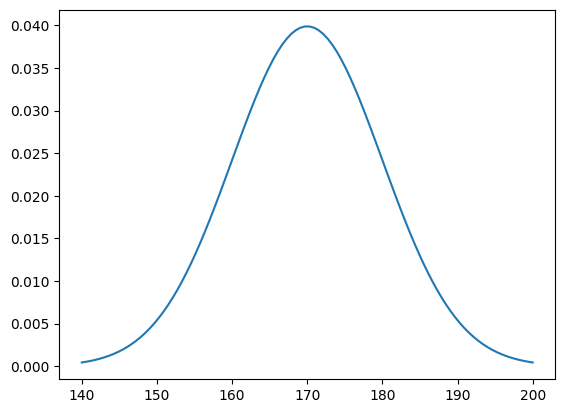

In [25]:
x = np.linspace(true_mean - 3*true_std, true_mean + 3*true_std, 100)
plt.plot(x, fg_normal(x, true_mean, true_std))
plt.show()

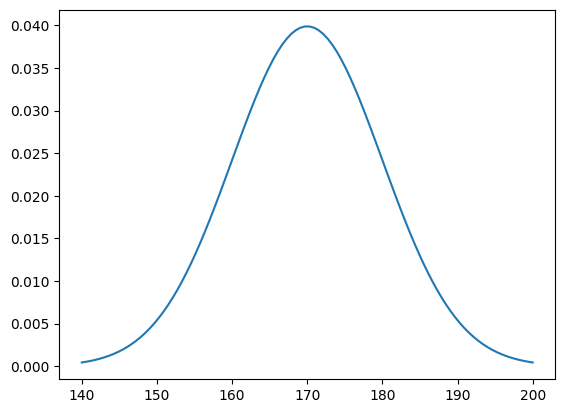

In [26]:
x = np.linspace(true_mean - 3*true_std, true_mean + 3*true_std, 100)
plt.plot(x, norm.pdf(x, true_mean, true_std))
plt.show()

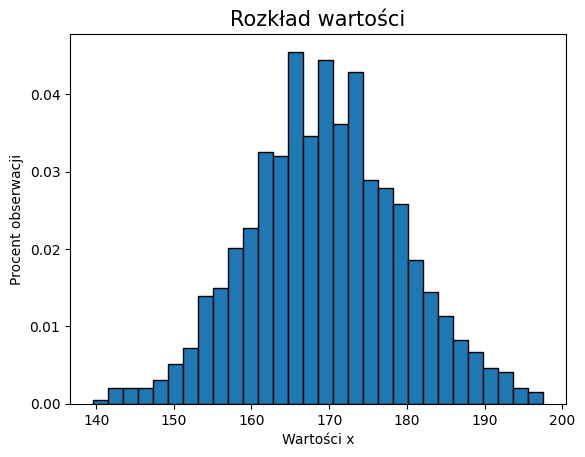

In [27]:
num_bins = 30
plt.hist(data, num_bins, density=True, edgecolor='k')
plt.title('Rozkład wartości', fontsize=15)
plt.xlabel(r'Wartości x')
plt.ylabel(r'Procent obserwacji')
plt.show()

Wiarygodność - cecha parametru (parametrów).

Im wyższa wiarygodność parametrów, tym lepiej model użyty z tymi parametrami jest w stanie odtworzyć posiadany zbiór danych.

$$
\mathcal{L}(\mathbf{\theta})=\mathbf{P}(\mathbf{x}|\mathbf{\theta})=\mathbf{P}(x_1,x_2,...,x_N|\mathbf{\theta})
$$


Przyjmujemy założenie o niezależności obserwacji wchodzących w skład $\mathbf{x}$.

$$
\mathcal{L}(\mathbf{\theta}) = \mathbf{P}(x_1,x_2,...,x_N|\mathbf{\theta})=\mathbf{P}(x_1|\mathbf{\theta}) \cdot \mathbf{P}(x_2|\mathbf{\theta}) \cdot ... \cdot \mathbf{P}(x_N|\mathbf{\theta})=\prod_{i=1}^{N} \mathbf{P}(x_i|\mathbf{\theta})
$$

Optymalne wartości parametrów:

$$
\hat{{\mathbf{\theta}}} = \argmax_{\mathbf{\theta}}{\mathcal{L}(\mathbf{\theta})}
$$

Przy obliczaniu wartości wyrażenia $\prod_{i=1}^{N} \mathbf{P}(x_i|\mathbf{\theta})$ zwykle pojawia się problem numeryczny wynikający z niedostaecznej precyzji obliczeń (obliczany jest iloczyn bardzo wielu wartości zbliżonych do zera). Z tego powodu zamiast funkcji $\mathcal{L}(\mathbf{\theta})$ rozważa się funkję $\log \mathcal{L}(\mathbf{\theta})$

$$
\log \mathcal{L}(\mathbf{\theta}) = \log \left( \prod_{i=1}^{N} \mathbf{P}(x_i|\mathbf{\theta}) \right) = \sum_{i=1}^{N} \log \left( \mathbf{P}(x_i|\mathbf{\theta}) \right)
$$

Po dokonaniu tej modyfikacji problem wyznaczania optymalnych wartości parametrów sprowadza się do postaci:

$$
\hat{{\mathbf{\theta}}} = \argmax_{\mathbf{\theta}} \log {\mathcal{L}(\mathbf{\theta})}
$$

Przekształcając powyższą formułę do zadania minimalizacji uzyskujemy:

$$
\hat{{\mathbf{\theta}}} = \argmin_{\mathbf{\theta}} \left( - \log {\mathcal{L}(\mathbf{\theta})} \right)
$$

### Próba znalezienia parametrów użytych do generowania przykładowego zestawu danych.

In [28]:

def negative_log_likelihood(params, vec):
    mean, std = params[0], params[1]
    neg_log_likelihood = -np.sum(norm.logpdf(vec, loc=mean, scale=std))
    return neg_log_likelihood

In [29]:
# Początkowe wartości parametrów
wartosci_poczatkowe = [160, 5]

# minimalizacja funkcji kryterium
res = minimize(negative_log_likelihood, x0 = wartosci_poczatkowe, args = (data), method='Nelder-Mead')

estimated_mean = res.x[0]
estimated_std = res.x[1]

print(f"Oszacowanie średniej: {estimated_mean}, oszacowanie odchylenia standardowego: {estimated_std}")

Oszacowanie średniej: 169.54745272192756, oszacowanie odchylenia standardowego: 9.870345092019607


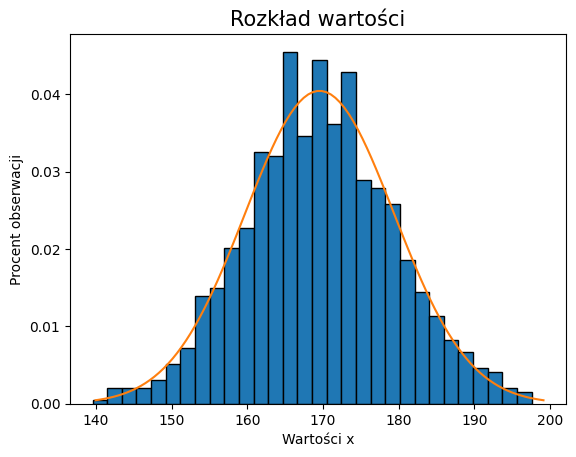

In [30]:
num_bins = 30
plt.hist(data, num_bins, density=True, edgecolor='k')
x = np.linspace(estimated_mean - 3*estimated_std, estimated_mean + 3*estimated_std, 100)
plt.plot(x, norm.pdf(x, estimated_mean, estimated_std))
plt.title('Rozkład wartości', fontsize=15)
plt.xlabel(r'Wartości x')
plt.ylabel(r'Procent obserwacji')
plt.show()

## MNW w szacowaniu parametrów funkcji regresji

Zakładamy, że wartości zmiennej zależnej $y$ wyznaczamy za pomocą liniowej funkcji regresji:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n
$$



Analizować będziemy wartości reszt:

$$
\varepsilon = y - \hat{y}
$$

Oczekujemy, że:

$$
\varepsilon \sim \mathcal{N}(0,\sigma)
$$

In [31]:
df = pd.read_excel('advertising.xlsx')

In [32]:
print(df.columns.tolist())

['TV', 'Radio', 'Newspaper', 'Sales']


### Szacowanie za pomocą metody najmniejszych kwadratów

In [33]:
model_LR = LinearRegression()

In [34]:
res=model_LR.fit(df.to_numpy()[:,0:3],df.to_numpy()[:,3])

In [35]:
print(res.coef_)

[0.05444578 0.10700123 0.00033566]


In [36]:
print(res.intercept_)

4.625124078808653


In [37]:
y_teor = model_LR.predict(df.to_numpy()[:,0:3])
std = np.std(df.to_numpy()[:,3]-y_teor)

In [38]:
print('a0 = ',res.intercept_)
print('a1 = ',res.coef_[0])
print('a2 = ',res.coef_[1])
print('a3 = ',res.coef_[2])
print('sigma = ',std)

a0 =  4.625124078808653
a1 =  0.05444578033757095
a2 =  0.1070012282387029
a3 =  0.00033565792233056224
sigma =  1.6449942697855562


### Szacowanie za pomocą metody największej wiarygodności

In [39]:
def nll(params, my_df):
    a0 = params[0]
    a1 = params[1]
    a2 = params[2]
    a3 = params[3]
    sigma = params[4]

    y_teor = a0 + a1 * my_df['TV'] + a2 * my_df['Radio'] + a3 * my_df['Newspaper']
    y_obs = my_df['Sales']

    return -np.sum(norm.logpdf(y_teor - y_obs, loc=0, scale=sigma))
    

In [40]:
# Początkowe wartości parametrów
wartosci_poczatkowe = [1,1,1,1,0.25]

# minimalizacja funkcji kryterium
res = minimize(nll, x0 = wartosci_poczatkowe, args = (df), method='Nelder-Mead')



In [41]:
print('a0 = ',res['x'][0])
print('a1 = ',res['x'][1])
print('a2 = ',res['x'][2])
print('a3 = ',res['x'][3])
print('sigma = ',res['x'][4])




a0 =  4.625091714649004
a1 =  0.05444594096789946
a2 =  0.1070019887701747
a3 =  0.00033546153319947443
sigma =  1.6449973246144105
